# Elbow Method & Silhouette Score for k selection

* Customer Segmentation Dataset

## Step--01 Load Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Step-02 Load Dataset

In [63]:
df = pd.read_csv("customer_segmentation.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Step-03 Data Preprocessing

In [55]:
df.shape

(10695, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [9]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

In [33]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### **Drop Non-Numeric and irrelevant columns (e.g., ID, Gender)**

In [ ]:
# Method-1 Drop other columns except Age, Work_Experience, Family_Size
# df = df.drop()

In [64]:
# Method-2 By dataframe
df1 = pd.DataFrame({"Age":df['Age'] , "Work_Experience":df['Work_Experience'] , "Family_Size":df['Family_Size']})
df1.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [57]:
# Method-3 Select specific columns from the same dataset
df2 = df[['Age','Work_Experience','Family_Size']]
df2.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [66]:
df2.shape

(10695, 3)

In [67]:
df2.dropna(inplace=True)

In [68]:
df2.shape

(9236, 3)

## Step-04 Scale the data (if needed)

In [69]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)

### **Methods of K Selection**

   1.  Elbow Method -
     The Elbow Method helps choose the optimal number of clusters (K) in K-Means.​

        `Usage:` It involves running K-Means with different K values and plotting the sum of squared distances (inertia) for each K. The “elbow” point on the graph, where inertia starts to level off, is often the optimal K.​
  
   2.  Silhouette Method -
     Silhouette Score evaluates the quality of clusters.​
  
        `Usage:` It measures how similar data points are to their own cluster (cohesion) compared to other clusters (separation). A higher Silhouette Score indicates better clustering. It’s calculated for various K values, and the K with the highest score is selected as optimal.​

## Step-05 Apply K-Means Algorithm for various k values

*  value will be less when it will be in the right cluster
*  value will be high when it will be in the wrong cluster
  
* Range of the Silhouette Score is between -1 and 1

In [70]:
inertia_values = []
silhouette_scores = []

k_range = range(2,11)

for k in k_range:
    Kmeans = KMeans(n_clusters = k , random_state = 42)
    Kmeans.fit(data_scaled)
    inertia_values.append(Kmeans.inertia_) 
    silhouette = silhouette_score(data_scaled , Kmeans.labels_)

    silhouette_scores.append(silhouette)


print("Silhouette score:",silhouette_scores)



Silhouette score: [0.2694972009523588, 0.3543380730251246, 0.35186036094189155, 0.3564238777132847, 0.36285216732331926, 0.35808478192614307, 0.3515340641430051, 0.34044504989108004, 0.34820568097637344]


## Step-06 Elbow Method

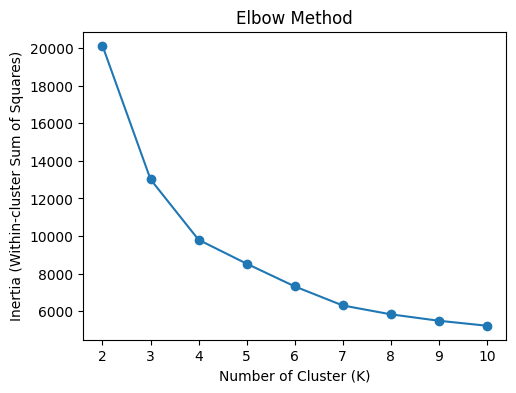

In [71]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(k_range,inertia_values,marker = 'o' , linestyle = '-')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

**Insights:**

* Best value of k is 4 (point from where the curve change)

## Step-07 Silhouette Score

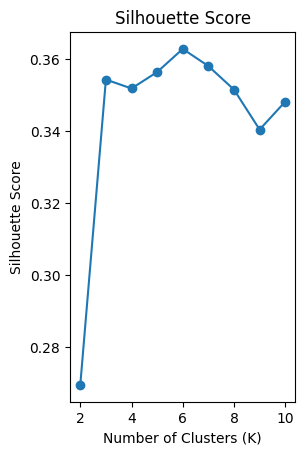

In [72]:
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores , marker = 'o' , linestyle = '-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score")
plt.show()